In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import os
import random
from tabulate import tabulate
import math

In [247]:
epsilon = 0.001
niter = 1000

def fx(x):        
    return 1/(x**2 - 3*x + 2)

In [248]:
# Generating random data
x = np.array([3 * i / niter for i in range(0, niter)])
y = np.array([-100 + np.random.normal(0,1) if fx(i) < -100 else
                100 + np.random.normal(0,1) if fx(i) > 100 else
                fx(i) + np.random.normal(0,1) for i in x])

In [249]:
# rational approximation function
def rat_approx_func(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

def least_squares(params, *args):
    a, b, c, d = params
    x, y = args[0], args[1]
    return np.sum((rat_approx_func(x, a, b, c, d) - y) ** 2)
    
def residuals(params, *args):
    a, b, c, d = params
    x, y = args[0], args[1]

    return abs(rat_approx_func(x, a, b, c, d) - y)

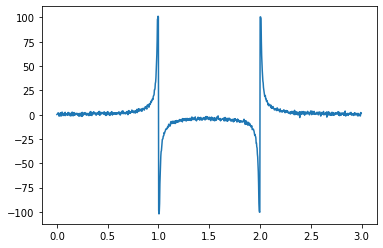

In [250]:
epsilon = 0.001
init_point = [1, -1, -1, 1]

plt.plot(x, y)
plt.show()

In [251]:
nelder = optimize.minimize(least_squares, init_point, args=(x, y), method='nelder-mead', tol=epsilon, options={'disp': True})
nelder_a, nelder_b, nelder_c, nelder_d = nelder['x']
print(nelder['x'])

[ 0.27173566 -0.54278394 -3.99562287  3.99124905]


In [252]:
levenberg = optimize.least_squares(residuals, init_point, args=(x, y), method='lm', xtol=epsilon)
levenberg_a, levenberg_b, levenberg_c, levenberg_d = levenberg['x']
print(levenberg['x'])

[-2.38496372  2.38809804 -2.00002819  1.00282623]


In [253]:
bounds = [(-5, 5), (-5, 5), (-5, 5), (-5, 5)]
evolution = optimize.differential_evolution(least_squares, bounds, args=(x, y), tol=epsilon)
evolution_a, evolution_b, evolution_c, evolution_d = evolution['x']
print(evolution)

     fun: 135034.33423567514
     jac: array([ 23339.546311  ,  25036.65761406,  66624.85579473, 166570.39915396])
 message: 'Optimization terminated successfully.'
    nfev: 8235
     nit: 134
 success: True
       x: array([-1.01570912,  1.01625666, -2.00106759,  1.00108427])


In [254]:
annealing = optimize.dual_annealing(least_squares, bounds, args=(x, y))
annealing_a, annealing_b, annealing_c, annealing_d = annealing['x']
print(annealing)

     fun: 135017.11074365902
 message: ['Maximum number of iteration reached']
    nfev: 9246
    nhev: 0
     nit: 1000
    njev: 249
  status: 0
 success: True
       x: array([-1.00109323,  1.00160744, -2.00097592,  1.00099206])


In [255]:
headers = ['a', 'b', 'c', 'd', 'Obtained f-value', 'Iterations', 'F-calculations']
index = ['Differential Evolution', 'Simulated Annealing', 'Nelder-Mead', 'Levenberg-Marquadt']
table = [
    [evolution_a, evolution_b, evolution_c, evolution_d, evolution['fun'], evolution['nit'], evolution['nfev']],
    [annealing_a, annealing_b, annealing_c, annealing_d, annealing['fun'], annealing['nit'], annealing['nfev']],
    [nelder_a, nelder_b, nelder_c, nelder_d, nelder['fun'], nelder['nit'], nelder['nfev']],    
    [levenberg_a, levenberg_b, levenberg_c, levenberg_d, levenberg['cost'], '-', levenberg['nfev']],
]
print(tabulate(table, headers=headers, showindex=index))

                                a          b         c        d    Obtained f-value  Iterations      F-calculations
----------------------  ---------  ---------  --------  -------  ------------------  ------------  ----------------
Differential Evolution  -1.01571    1.01626   -2.00107  1.00108              135034  134                       8235
Simulated Annealing     -1.00109    1.00161   -2.00098  1.00099              135017  1000                      9246
Nelder-Mead              0.271736  -0.542784  -3.99562  3.99125              182457  472                        800
Levenberg-Marquadt      -2.38496    2.3881    -2.00003  1.00283              115892  -                          136


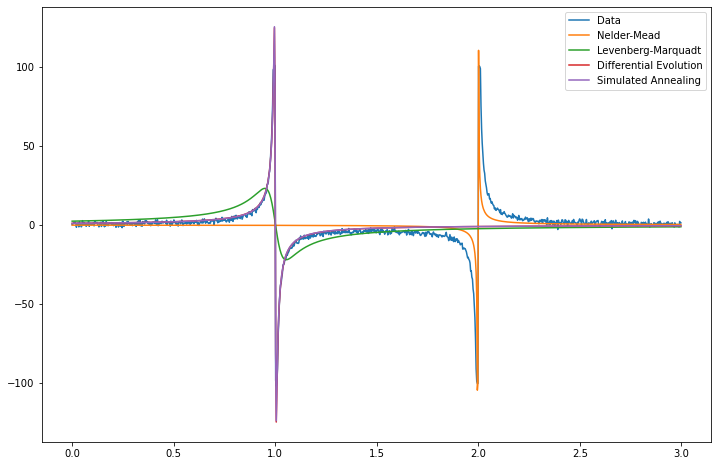

In [256]:
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, rat_approx_func(x, nelder_a, nelder_b, nelder_c, nelder_d), label='Nelder-Mead')
plt.plot(x, rat_approx_func(x, levenberg_a, levenberg_b, levenberg_c, levenberg_d), label='Levenberg-Marquadt')
plt.plot(x, rat_approx_func(x, evolution_a, evolution_b, evolution_c, evolution_d), label='Differential Evolution')
plt.plot(x, rat_approx_func(x, annealing_a, annealing_b, annealing_c, annealing_d), label='Simulated Annealing')
plt.legend(['Data', 'Nelder-Mead', 'Levenberg-Marquadt', 'Differential Evolution', 'Simulated Annealing'])
plt.show()